In [86]:
import pandas as pd

In [91]:
import spotipy.util as util
import spotipy
import os.path as path

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = 'c8025d9d9bb24c1c8f6156a5f66dcfe1'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

In [92]:
wham_search = spotify.search(q='wham!', type='artist')
wham_id = wham_search['artists']['items'][0]['id']
wham_id

'5lpH0xAS4fVfLkACg9DAuM'

In [93]:
gm_search = spotify.search(q='George Michael', type='artist')
gm_id = gm_search['artists']['items'][0]['id']
gm_id

'19ra5tSw0tWufvUp8GotLo'

In [94]:
def is_wham_gm(track):
    all_artist_ids = [artist['id'] for artist in track['artists']]
    if (gm_id in all_artist_ids) or (wham_id in all_artist_ids):
        return True
    else:
        return False

df = pd.DataFrame()
filepath = "../data/George Michael Wham Back Catalogue.csv"
if not path.exists(filepath):
    artists = [wham_id, gm_id]
    for artist in artists: 
        albums = spotify.artist_albums(artist)
        for album in albums['items']:
            tracks = spotify.album_tracks(album['id'])
            for track in tracks['items']:
                if is_wham_gm(track):
                    audio_features = spotify.audio_features(track['id'])[0]
                    audio_features['track_name'] = track['name']
                    audio_features['album_name'] = album['name']
                    audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
                    audio_features['release_date'] = album['release_date']
                    df = df.append(audio_features, ignore_index=True)
    df.to_csv(path_or_buf = filepath)
else:
    df = pd.read_csv(filepath)
    
df.sample(10)

,Unnamed: 0,acousticness,album_name,analysis_url,artist,danceability,duration_ms,energy,id,instrumentalness,...,mode,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
158,158,0.85200,Symphonica,https://api.spotify.com/v1/audio-analysis/2Uvi...,George Michael,0.498,254181.0,0.266,2UviQmXcpUTVkneqszQqn3,0.003810,...,1.0,2014-01-01,0.0267,100.353,4.0,https://api.spotify.com/v1/tracks/2UviQmXcpUTV...,A Different Corner - Live,audio_features,spotify:track:2UviQmXcpUTVkneqszQqn3,0.3420
9,9,0.26000,Uma Segunda Chance para Amar (Trilha Sonora Or...,https://api.spotify.com/v1/audio-analysis/0Jg5...,Wham!,0.874,329403.0,0.703,0Jg5LvFt4AbUt4tEYMKUQK,0.006290,...,0.0,2019-11-08,0.0312,115.933,4.0,https://api.spotify.com/v1/tracks/0Jg5LvFt4AbU...,Everything She Wants - Edit,audio_features,spotify:track:0Jg5LvFt4AbUt4tEYMKUQK,0.9460
171,171,0.16900,Symphonica (Deluxe Version),https://api.spotify.com/v1/audio-analysis/5zLz...,George Michael,0.530,116731.0,0.716,5zLzSCTEdbEh2sGnaplWt4,0.000000,...,1.0,2014-01-01,0.1130,145.655,4.0,https://api.spotify.com/v1/tracks/5zLzSCTEdbEh...,My Baby Just Cares For Me - Live,audio_features,spotify:track:5zLzSCTEdbEh2sGnaplWt4,0.5560
26,26,0.17400,George Michael & Wham! Last Christmas: The Ori...,https://api.spotify.com/v1/audio-analysis/56Dh...,George Michael,0.675,390031.0,0.871,56DhfFHSPkwPNkwSKRV22D,0.000026,...,1.0,2019-11-08,0.0436,91.811,4.0,https://api.spotify.com/v1/tracks/56DhfFHSPkwP...,Freedom! '90 - Remastered,audio_features,spotify:track:56DhfFHSPkwPNkwSKRV22D,0.9040
225,225,0.10300,Older,https://api.spotify.com/v1/audio-analysis/4V4U...,George Michael,0.682,381627.0,0.444,4V4Ur4PJskr5vR2ek8VHWw,0.000039,...,0.0,1996-05-13,0.0692,150.282,4.0,https://api.spotify.com/v1/tracks/4V4Ur4PJskr5...,Spinning the Wheel,audio_features,spotify:track:4V4Ur4PJskr5vR2ek8VHWw,0.4340
208,208,0.10400,Songs From The Last Century,https://api.spotify.com/v1/audio-analysis/5DvA...,George Michael,0.483,159547.0,0.511,5DvAuonLamxQJUiY44tBiq,0.000001,...,0.0,1999-12-06,0.0284,75.555,4.0,https://api.spotify.com/v1/tracks/5DvAuonLamxQ...,Secret Love,audio_features,spotify:track:5DvAuonLamxQJUiY44tBiq,0.7710
180,180,0.77600,Symphonica (Deluxe Version),https://api.spotify.com/v1/audio-analysis/3yTg...,George Michael,0.489,285362.0,0.317,3yTgmjZoG8OnQXmE9aNSc2,0.000000,...,0.0,2014-01-01,0.0335,119.975,4.0,https://api.spotify.com/v1/tracks/3yTgmjZoG8On...,Going To A Town - Live,audio_features,spotify:track:3yTgmjZoG8OnQXmE9aNSc2,0.0617
39,39,0.86800,Make It Big,https://api.spotify.com/v1/audio-analysis/5s34...,Wham!,0.698,255440.0,0.149,5s34maXRJLyzQTZ5QyP1EV,0.014700,...,1.0,1984-10-23,0.0362,129.404,4.0,https://api.spotify.com/v1/tracks/5s34maXRJLyz...,Like A Baby,audio_features,spotify:track:5s34maXRJLyzQTZ5QyP1EV,0.2630
153,153,0.00258,Listen Without Prejudice / MTV Unplugged (Deluxe),https://api.spotify.com/v1/audio-analysis/4xTj...,George Michael,0.761,272372.0,0.771,4xTjhIFjK1iF91dHIJ6MLJ,0.264000,...,0.0,2017-10-20,0.0535,117.857,4.0,https://api.spotify.com/v1/tracks/4xTjhIFjK1iF...,Fantasy '98,audio_features,spotify:track:4xTjhIFjK1iF91dHIJ6MLJ,0.9100
42,42,0.25900,Make It Big,https://api.spotify.com/v1/audio-analysis/60bi...,Wham!,0.834,309667.0,0.449,60binwdlGxE67H2oJOQc6U,0.000000,...,1.0,1984-10-23,0.0409,129.642,4.0,https://api.spotify.com/v1/tracks/60binwdlGxE6...,Credit Card Baby,audio_features,spotify:track:60binwdlGxE67H2oJOQc6U,0.8600


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

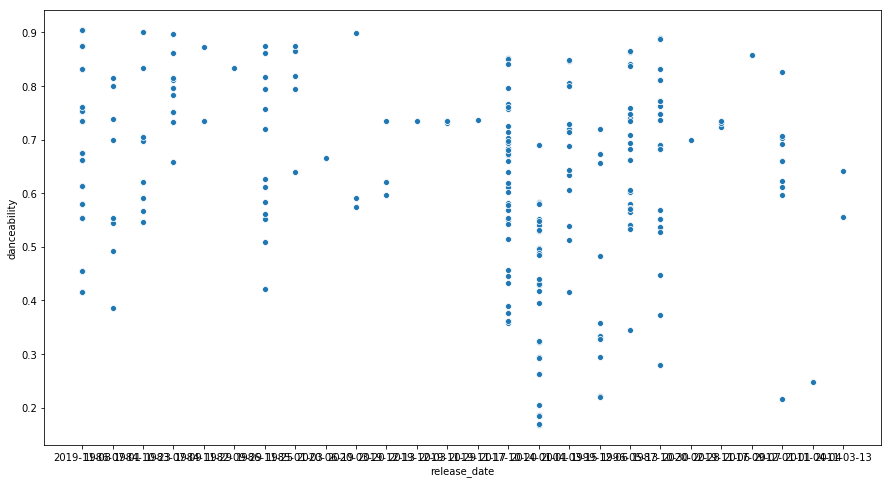

In [107]:
df2 = df[['release_date', 'danceability']]
df2.sort_values('release_date', ascending= True) 
plt.figure(figsize=(15,8))
plot = sns.scatterplot(x = df2['release_date'], y = df2['danceability'])
plot

In [118]:
df['album_name'].unique()

array(['Uma Segunda Chance para Amar (Trilha Sonora Original)',
       'George Michael & Wham! Last Christmas: The Original Motion Picture Soundtrack',
       'Music From The Edge Of Heaven', 'Make It Big', 'Fantastic',
       'LAST CHRISTMAS', 'Wham Rap! (Enjoy What You Do?)', 'The Final',
       'Wham 12" Mixes', 'TOP 40 HITDOSSIER - Zomer',
       'TOP 40 HITDOSSIER - 80s', 'Christmas Hits',
       'NYTÅR 2020 FESTEN - MUSIKKEN TIL NYTÅRSFESTEN',
       'Das Beste aus Formel Eins, Vol. 1',
       'Julklassiker - Julsånger för alla',
       'Julmusik - Julsånger för alla', 'God Jul - Julmusik för alla',
       'Jullåtar - Julfavoriter för alla',
       'Julsånger - Julklassiker för alla', 'Christmas Eve',
       'Listen Without Prejudice / MTV Unplugged (Deluxe)', 'Symphonica',
       'Symphonica (Deluxe Version)', 'Patience',
       'Songs From The Last Century', 'Older', 'Faith', 'Always',
       'This Is How (We Want You To Get High)',
       'Fantasy (feat. Nile Rodgers)', 'Let H